In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [5]:
airlines_data=pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
airlines_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
airlines_data.shape

(3999, 12)

In [7]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
airlines_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [9]:
airlines_data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [10]:
airlines_data.duplicated().sum()

0

In [11]:
airlines_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


**Data Preparation**

In [12]:
airlines_data.drop('ID#', axis=1, inplace=True)
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
scalar=MinMaxScaler()
scalar=scalar.fit_transform(airlines_data)

In [15]:
scaled_data=pd.DataFrame(scalar,columns=airlines_data.columns)
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


**Hierarchical Clustering**

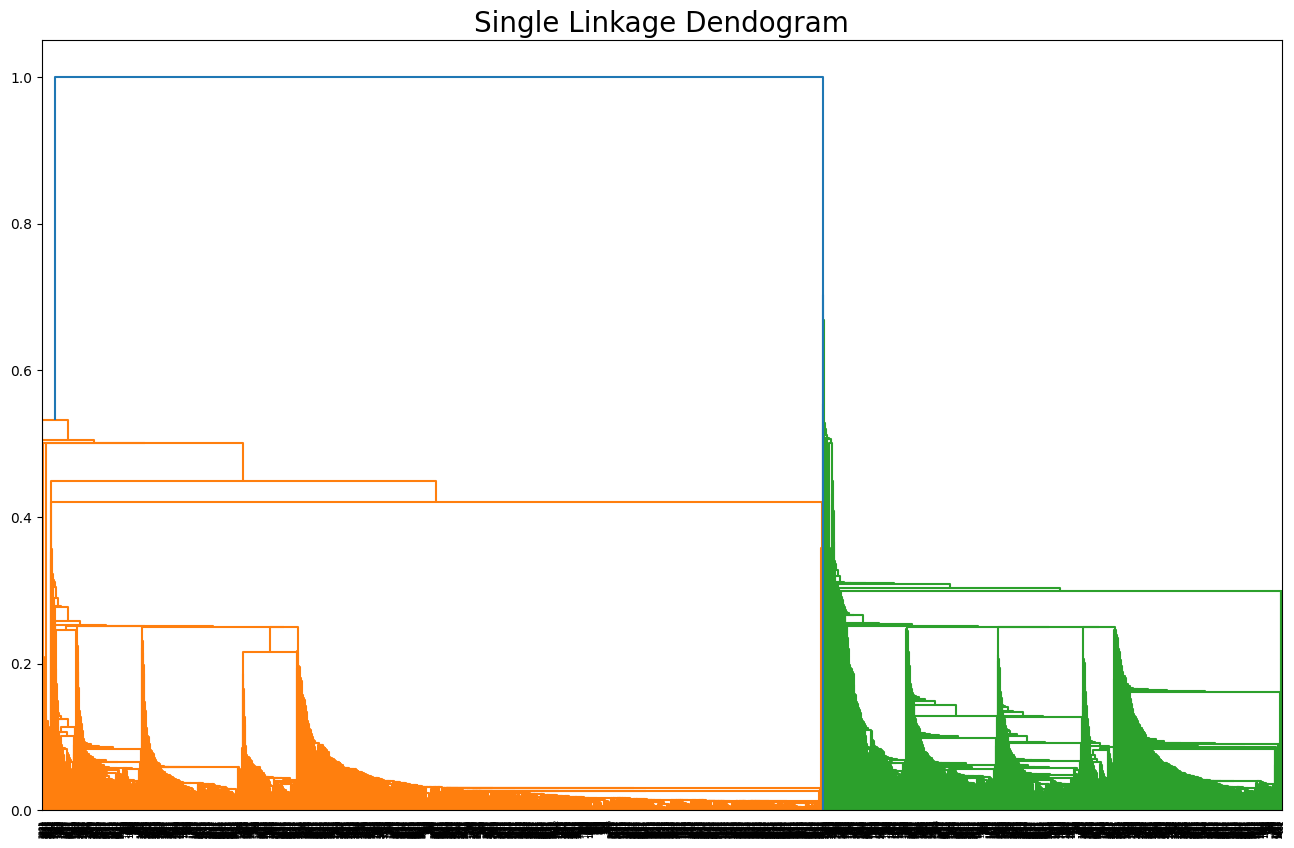

In [17]:
fig=plt.figure(figsize=(16,10))
dendogram=sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.title('Single Linkage Dendogram', size=20)
plt.show()

In [19]:
hc_single=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')

In [20]:
y_hc_single=hc_single.fit_predict(scaled_data)

In [21]:
airlines_data['Cluster']=y_hc_single
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [22]:
airlines_data['Cluster'].value_counts()

0    2518
1    1478
4       1
3       1
2       1
Name: Cluster, dtype: int64

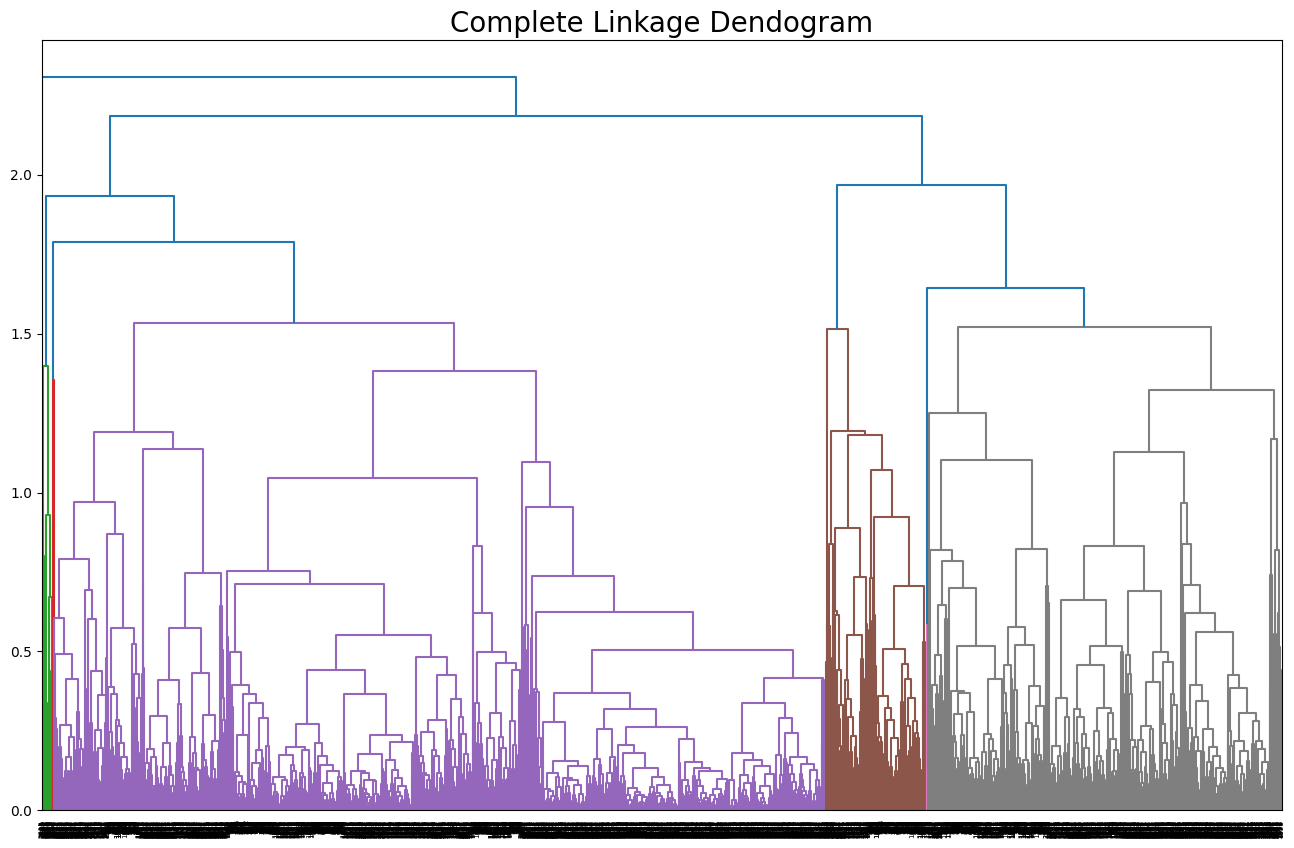

In [23]:
fig=plt.figure(figsize=(16,10))
dendogram=sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.title('Complete Linkage Dendogram', size=20)
plt.show()

In [24]:
hc_complete=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [25]:
y_hc_complete=hc_complete.fit_predict(scaled_data)

In [26]:
airlines_data['Cluster']=y_hc_complete
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [27]:
airlines_data['Cluster'].value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: Cluster, dtype: int64

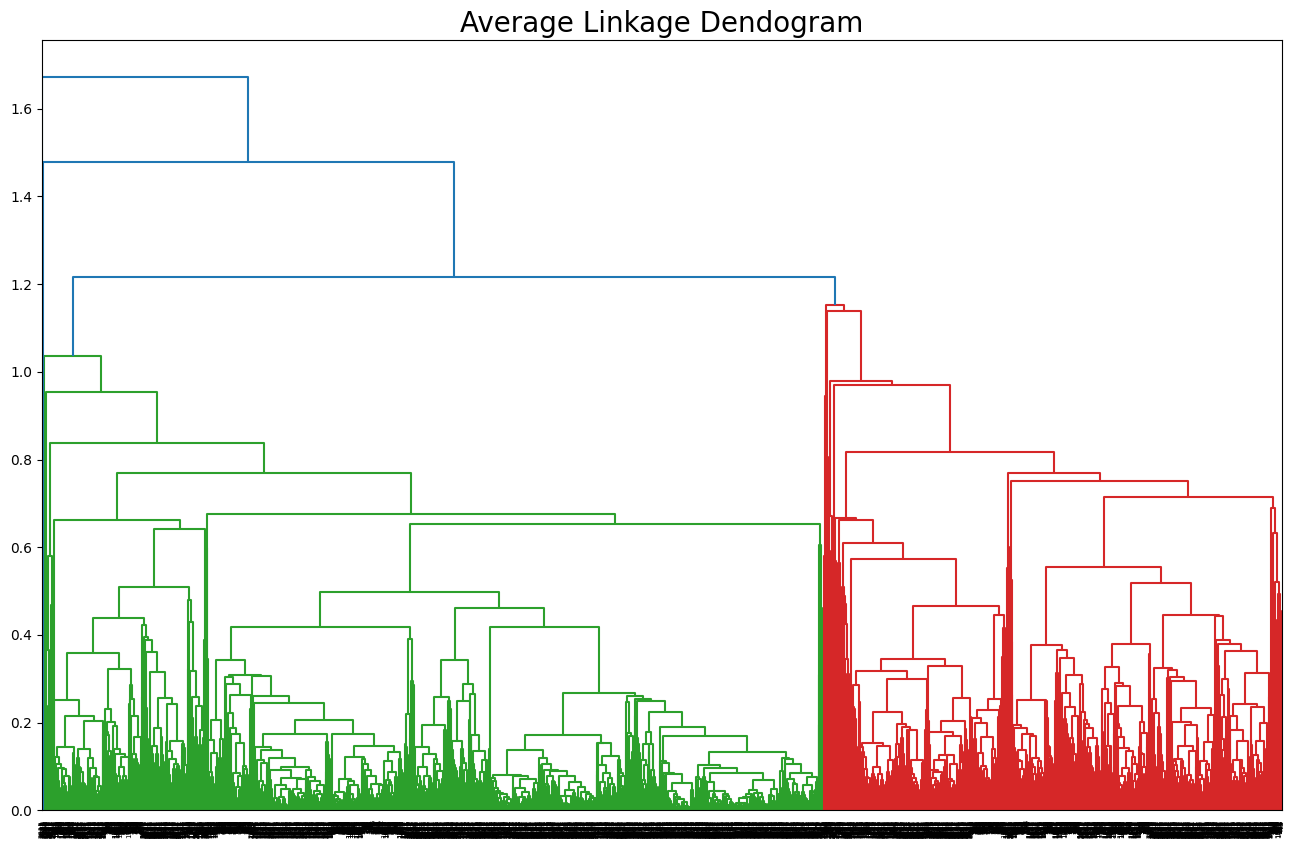

In [28]:
fig=plt.figure(figsize=(16,10))
dendogram=sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.title('Average Linkage Dendogram', size=20)
plt.show()

In [29]:
hc_ave=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')

In [30]:
y_hc_ave=hc_ave.fit_predict(scaled_data)

In [31]:
airlines_data['Cluster']=y_hc_ave
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [32]:
airlines_data['Cluster'].value_counts()

1    2518
0    1468
4       8
3       4
2       1
Name: Cluster, dtype: int64

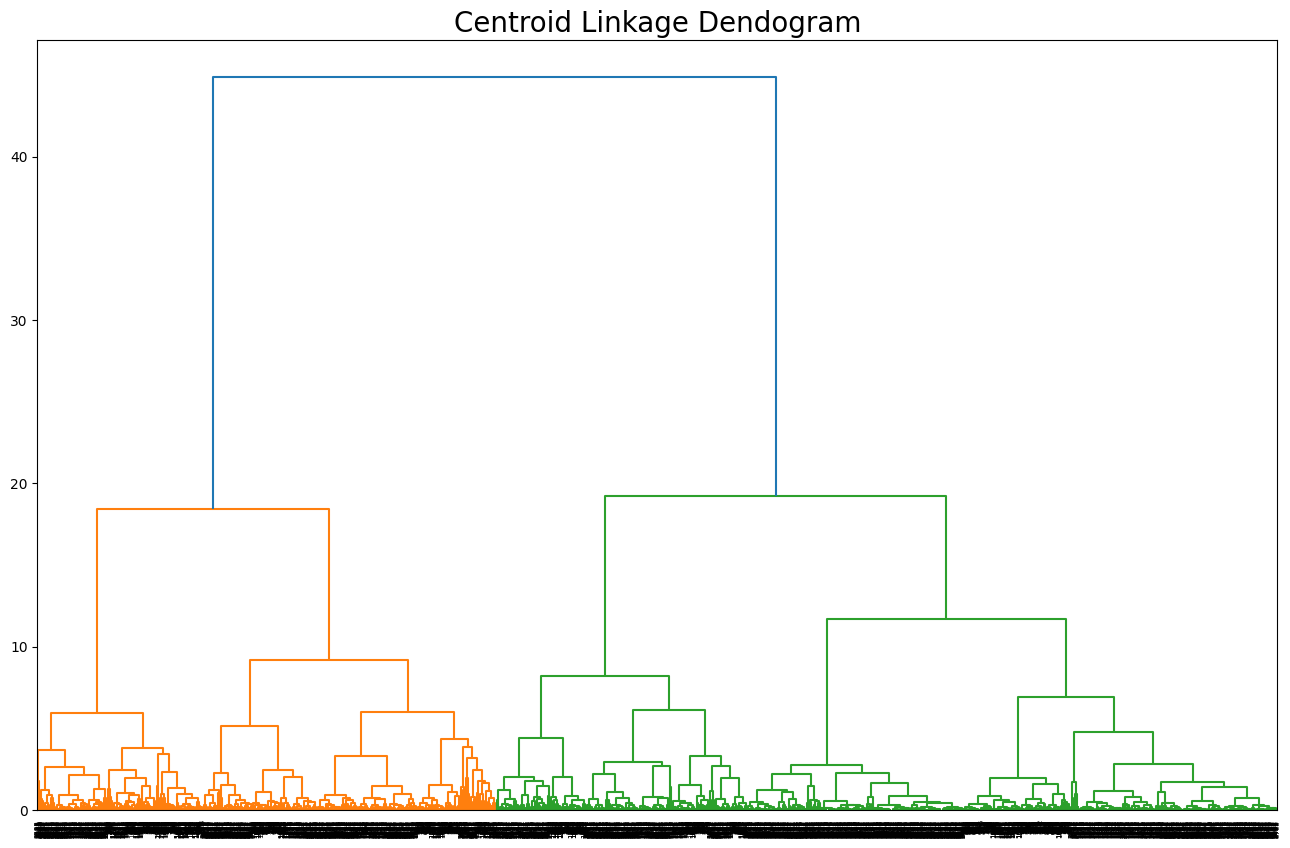

In [33]:
fig=plt.figure(figsize=(16,10))
dendogram=sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Centroid Linkage Dendogram', size=20)
plt.show()

In [34]:
hc_ward=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [35]:
y_hc_ward=hc_ward.fit_predict(scaled_data)

In [36]:
airlines_data['Cluster']=y_hc_ward
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [37]:
airlines_data['Cluster'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: Cluster, dtype: int64

**K-Means Clustering**

In [40]:
sse=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, random_state=13)
  kmeans.fit(scaled_data)
  sse.append(kmeans.inertia_)

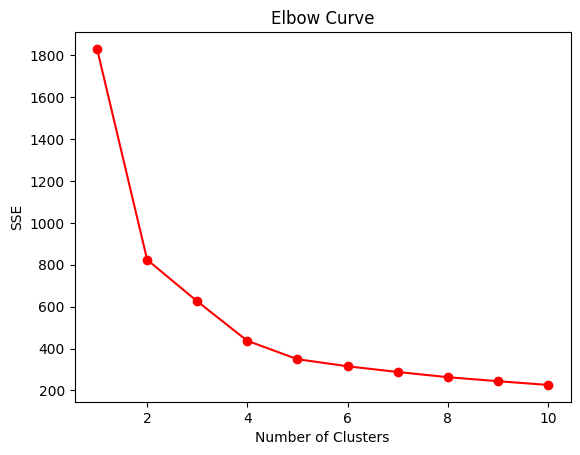

In [43]:
plt.plot(range(1,11), sse, 'bo-', color='r')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [44]:
k_means=KMeans(5, random_state=42)
k_means.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [45]:
pred_kmeans=k_means.fit_predict(scaled_data)

In [46]:
airlines_data['Cluster']=pred_kmeans
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [47]:
airlines_data['Cluster'].value_counts()

4    1032
1     868
0     808
2     673
3     618
Name: Cluster, dtype: int64

**DBSCAN Clustering**

In [48]:
dbscan=DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(scaled_data)

DBSCAN(eps=0.9)

In [49]:
db_pred=dbscan.fit_predict(scaled_data)

In [50]:
airlines_data['Cluster']=db_pred
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [51]:
silhouette_SLM=(metrics.silhouette_score(scaled_data,y_hc_single))
silhouette_SLM

0.48005487141025094

In [52]:
silhouette_CLM=(metrics.silhouette_score(scaled_data,y_hc_complete))
silhouette_CLM

0.4167248248554338

In [53]:
silhouette_ALM=(metrics.silhouette_score(scaled_data,y_hc_ave))
silhouette_ALM

0.5082555071160846

In [54]:
silhouette_CenLM=(metrics.silhouette_score(scaled_data,y_hc_ward))
silhouette_CenLM

0.3762586351398372

In [55]:
silhouette_KMeans=(metrics.silhouette_score(scaled_data,pred_kmeans))
silhouette_KMeans

0.4430672072796034

In [56]:
silhouette_DBSCAN=(metrics.silhouette_score(scaled_data,db_pred))
silhouette_DBSCAN

0.535930510919477

In [59]:
tabel={'Clustering Models':['HC Single Linkage', 'HC Complete Linkage', 'HC Average Linkage',
                            'HC Centroid Linkage', 'KMeans', 'DBSCAN'],
       'Silhouette Score':[silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_CenLM, silhouette_KMeans, silhouette_DBSCAN]}
tabel=pd.DataFrame(tabel)
tabel

,Clustering Models,Silhouette Score
0,HC Single Linkage,0.480055
1,HC Complete Linkage,0.416725
2,HC Average Linkage,0.508256
3,HC Centroid Linkage,0.376259
4,KMeans,0.443067
5,DBSCAN,0.535931
